# <span style="font-family:Georgia; text-align:center;">Arreglos 1-D y 2-D (listas, NumPy, cadenas)  </span> 
<span style="font-family:Georgia;">


<span style="font-family:Georgia;">

**Objetivos de aprendizaje**
- Entender la **intuición** de trabajar con arreglos unidimensionales (listas de Python y `numpy.ndarray`) y bidimensionales (matrices).
- Distinguir las **ventajas** de NumPy frente a las listas nativas al hacer cálculo numérico.
- Manipular **cadenas de caracteres** como secuencias (indexado, rebanado y utilidades).
- Aplicar operaciones elementales con **matrices** y resolver problemas sencillos de **álgebra matricial**.
- Resolver **problemas aplicados** usando las herramientas vistas.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## <span style="font-family:Georgia; text-align:center;">1. Arreglos 1-D: listas y arrays de NumPy</span> 

<span style="font-family:Georgia;">

Una **lista** es una secuencia *flexible* que puede guardar combinaciones de tipos. 
Para cómputo numérico intensivo no es eficiente, pero es ideal para **construir** colecciones y **preprocesar** datos.

In [ ]:
# Crear y manipular listas
numeros = [3, 1, 4, 1, 5, 9]
print("lista:", numeros)
print("len:", len(numeros))
print("indexado [0], [-1]:", numeros[0], numeros[-1])
print("rebanado [1:4]:", numeros[1:4])

# Agregar y modificar
numeros.append(2)
numeros[2] = 42
print("modificada:", numeros)

# Comprensiones de listas (ejemplo: cuadrados)
cuadrados = [x**2 for x in numeros]
print("cuadrados:", cuadrados)

# Suma 
print("sum(numeros):", sum(numeros))

lista: [3, 1, 4, 1, 5, 9]
len: 6
indexado [0], [-1]: 3 9
rebanado [1:4]: [1, 4, 1]
modificada: [3, 1, 42, 1, 5, 9, 2]
cuadrados: [9, 1, 1764, 1, 25, 81, 4]
sum(numeros): 63


<span style="font-family:Georgia;">

Un *array de NumPy* es como una regla de números del mismo tipo, optimizado para **cálculo numérico vectorizado**.

In [4]:
edades = [18, 20, 19, 22, 21]

edades_np = np.array(edades)
print("Tipo:", type(edades_np))
print("Shape:", edades_np.shape)
print("Vectorización (sumar 1):", edades_np + 1)
print("Promedio con NumPy:", np.mean(edades_np))

Tipo: <class 'numpy.ndarray'>
Shape: (5,)
Vectorización (sumar 1): [19 21 20 23 22]
Promedio con NumPy: 20.0


<span style="font-family:Georgia;">

**Ejemplo:** temperaturas en Fahrenheit a Celsius.

In [5]:
F = [68, 70, 72, 75, 80]  # lista de Fahrenheit
# Con comprensión de listas
C1 = [(f - 32)*(5/9) for f in F]
print("C1 (lista):", C1)

C1 (lista): [20.0, 21.11111111111111, 22.22222222222222, 23.88888888888889, 26.666666666666668]


<span style="font-family:Georgia;">

**Ventajas de listas:** sencillas, flexibles, soportan elementos heterogéneos.  
**Limitación:** operaciones numéricas element-wise son manuales (bucles), lo que puede ser **lento**.

## <span style="font-family:Georgia; text-align:center;">Arreglos 1‑D con **NumPy**</span> 
<span style="font-family:Georgia;">

`numpy.ndarray` es un arreglo **homogéneo** (todos los elementos del mismo tipo) y contiguo en memoria.  
La gran ventaja es que las operaciones son **vectorizadas** (se aplican a todo el arreglo sin bucles explícitos) y **rápidas**.

In [15]:
# Crear arreglos desde listas
x = np.array([3, 1, 4, 1, 5, 9], dtype=float)
y = np.array([2, 7, 1, 8, 2, 8], dtype=float)
print("x:", x)
print("dtype:", x.dtype)

# Operaciones vectorizadas
print("x + 10:", x + 10)
print("x * 2:", x * 2)
print("x + y:", x + y)
print("x * y:", x * y)  # elemento a elemento

# Indexado booleano
print("x[x > 3]:", x[x > 3])


x: [3. 1. 4. 1. 5. 9.]
dtype: float64
x + 10: [13. 11. 14. 11. 15. 19.]
x * 2: [ 6.  2.  8.  2. 10. 18.]
x + y: [ 5.  8.  5.  9.  7. 17.]
x * y: [ 6.  7.  4.  8. 10. 72.]
x[x > 3]: [4. 5. 9.]


<span style="font-family:Georgia;">

**Comparación clave:** en listas tendríamos que *iterar*; con NumPy, escribimos la intención y el motor hace el trabajo de manera eficiente.

## <span style="font-family:Georgia; text-align:center;">Cadenas de caracteres como secuencias</span> 
<span style="font-family:Georgia;"> 

Una **cadena** es una secuencia inmutable de caracteres. Puedes **indexar** y **rebanar** igual que en listas, 
y trae muchos **métodos** útiles (`lower`, `split`, `join`, etc.).

In [21]:
s = "Programación con Python y NumPy"
print("s[0], s[-1]:", s[0], s[-1])
print("s[0:12]:", s[0:12])

print("lower():", s.lower())
palabras = s.lower().split()
print("split():", palabras)
print("'|'.join(palabras):", "|".join(palabras))

def contar_caracteres(cadena: str) -> dict[str, int]:
    """Cuenta frecuencia de caracteres en una cadena (sensible a mayúsculas/minúsculas)."""
    frec: dict[str, int] = {}
    for ch in cadena:
        frec[ch] = frec.get(ch, 0) + 1
    return frec

def contar_palabras(texto: str) -> dict[str, int]:
    """Cuenta palabras separadas por espacios/puntuación simple."""
    sep = ".,;:!?¡¿()\n\t"
    limpio = texto.lower()
    for s in sep:
        limpio = limpio.replace(s, " ")
    palabras = [p for p in limpio.split(" ") if p]
    frec: dict[str, int] = {}
    for p in palabras:
        frec[p] = frec.get(p, 0) + 1
    return frec


texto = "¡Hola, hola! ¿Cómo va todo? Python, python; PYTHON..."
print("conteo palabras:", contar_palabras(texto))
print("conteo caracteres de 'aba':", contar_caracteres("aba"))

s[0], s[-1]: P y
s[0:12]: Programación
lower(): programación con python y numpy
split(): ['programación', 'con', 'python', 'y', 'numpy']
'|'.join(palabras): programación|con|python|y|numpy
conteo palabras: {'hola': 2, 'cómo': 1, 'va': 1, 'todo': 1, 'python': 3}
conteo caracteres de 'aba': {'a': 2, 'b': 1}


## <span style="font-family:Georgia; text-align:center;">Arreglos 2‑D (matrices)</span> 
<span style="font-family:Georgia;"> 

Una **matriz** es un arreglo con dos ejes: *filas* y *columnas*.
- `A.shape` te dice el tamaño.
- `A[i, j]` indexa un elemento.
- `A[i, :]` es una fila; `A[:, j]` es una columna.

In [22]:
A = np.array([[1., 2., 3.],
              [4., 5., 6.]])
B = np.array([[10., 20., 30.],
              [40., 50., 60.]])
print("A:\n", A)
print("shape A:", A.shape)

print("A[0, 1]:", A[0, 1])   # fila 0, col 1
print("A[1, :]:", A[1, :])   # fila 1 completa
print("A[:, 0]:", A[:, 0])   # primera columna

print("Suma A+B:\n", A + B)
print("Elemento a elemento A*B:\n", A * B)
print("Transpuesta A.T:\n", A.T)

A:
 [[1. 2. 3.]
 [4. 5. 6.]]
shape A: (2, 3)
A[0, 1]: 2.0
A[1, :]: [4. 5. 6.]
A[:, 0]: [1. 4.]
Suma A+B:
 [[11. 22. 33.]
 [44. 55. 66.]]
Elemento a elemento A*B:
 [[ 10.  40.  90.]
 [160. 250. 360.]]
Transpuesta A.T:
 [[1. 4.]
 [2. 5.]
 [3. 6.]]


**Operación matricial** (no elemento a elemento): usa `@` o `np.matmul`.

In [25]:
C = np.array([[1., 0.],
              [0., 1.],
              [1., 1.]])   # 3x2
print("A (2x3) @ C (3x2) =")
print(A @ C)  # resultado 2x2

A (2x3) @ C (3x2) =
[[ 4.  5.]
 [10. 11.]]


### <span style="font-family:Georgia; text-align:center;">Ejemplo: Calificaciones con ponderaciones</span> 
<span style="font-family:Georgia;">  

Tres actividades (tareas, proyecto, examen) con pesos `[0.2, 0.3, 0.5]`.  
Con **producto matriz-vector** obtenemos la calificación final por estudiante.

In [ ]:
calificaciones = np.array([
    [85, 90, 70],   # Estudiante 1
    [60, 75, 80],   # Estudiante 2
    [95, 85, 90],   # Estudiante 3
], dtype=float)

pesos = np.array([0.2, 0.3, 0.5], dtype=float)
finales = calificaciones @ pesos
print("Calificaciones finales:", finales)

Calificaciones finales: [79.  74.5 89.5]


### <span style="font-family:Georgia; text-align:center;">Ejemplo: Transformación geométrica 2D</span> 
<span style="font-family:Georgia;">  

Una **rotación + escala** se representa con una matriz 2×2. Multiplicamos puntos `N×2` por `M.T`.

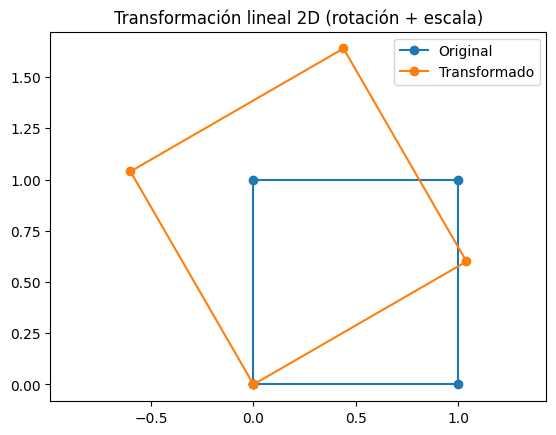

In [27]:

# Cuadrado unidad
puntos = np.array([
    [0,0],[1,0],[1,1],[0,1],[0,0]
], dtype=float)

# Rotación 30° y escala 1.2
theta = np.deg2rad(30)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]], dtype=float)
S = 1.2 * np.eye(2)
M = S @ R

puntos_tx = puntos @ M.T

plt.figure()
plt.plot(puntos[:,0], puntos[:,1], marker="o", label="Original")
plt.plot(puntos_tx[:,0], puntos_tx[:,1], marker="o", label="Transformado")
plt.axis("equal")
plt.title("Transformación lineal 2D (rotación + escala)")
plt.legend()
plt.show()


## <span style="font-family:Georgia; text-align:center;">Buenas prácticas al combinar **listas** y **NumPy**</span> 
<span style="font-family:Georgia;">   

- Usa **listas** para construir/recopilar datos heterogéneos o antes de limpiar.
- Convierte a **NumPy** cuando vas a hacer **cálculo** vectorizado/matricial.
- Prefiere funciones **robustas** que acepten ambos tipos.
- Documenta bien las **dimensiones** esperadas (vector vs matriz).
- En problemas aplicados, **modela primero** (qué representan tus arreglos) y después programa.

## <span style="font-family:Georgia; text-align:center;">Referencias</span> 
<span style="font-family:Georgia;">    

- **Documentación de NumPy**.
- **W. McKinney (2022). *Python for Data Analysis*.** O'Reilly.
- **J. VanderPlas (2016). *A Whirlwind Tour of Python*.** O'Reilly.